# Lab 1 - Part B: The Race to Electric Cars

In the Part A of this lab, we have learned how to do basic query with SPARQL. You
should be able to write a query to get the patent information for your research
or business project. In this part, we will analyze the patent data to understand
the trend of electric cars.

We want to find out:

- Which countries have the most patents on electric cars?
- Which companies have the most patents on electric cars?
- What are the most popular technologies in electric cars?
- What are companies' strategies in electric cars when they file patents?

Those questions will lead us to understand more about the innovation in electric
cars. Let's start it!

In [2]:
library(pacman)
# vtree: sudo apt-get install libcairo2-dev librsvg2-dev
# https://yulab-smu.top/treedata-book/index.html
p_load(readxl, stringr, data.table, magrittr, ggplot2, SPARQL,
        eurostat, XML, RCurl, knitr, vtree, pheatmap)

# color palette
gray_scale <- c('#F3F4F8','#D2D4DA', '#B3B5BD', 
                '#9496A1', '#7d7f89', '#777986', 
                '#656673', '#5B5D6B', '#4d505e',
                '#404352', '#2b2d3b', '#282A3A',
                '#1b1c2a', '#191a2b',
                '#141626', '#101223')

ft_palette <- c('#990F3D', '#0D7680', '#0F5499', '#262A33', '#FFF1E5')

ft_contrast <- c('#F83', '#00A0DD', '#C00', '#006F9B', '#F2DFCE', '#FF7FAA',
                 '#00994D', '#593380')

peep_head <- function(dt, n = 5) {
    dt %>%
        head(n) %>%
        kable()
}

peep_sample <- function(dt, n = 5) {
    dt %>%
        .[sample(.N, n)] %>%
        kable()
}

peep_tail <- function(dt, n = 5) {
    dt %>%
        tail(n) %>%
        kable()
}

In [98]:
# read the datqset
h01m <- fread('../data/patent_H01M_2014_2024.csv')
str(h01m)

Classes ‘data.table’ and 'data.frame':	69017 obs. of  14 variables:
 $ publn      : chr  "http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-" "http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-" "http://data.epo.org/linked-data/data/publication/EP/1659653/B1/-" "http://data.epo.org/linked-data/data/publication/EP/2755269/A1/-" ...
 $ applicant  : chr  "http://data.epo.org/linked-data/data/vc/AEC648C9D6BD5416D6990A8C8B56CD4B" "http://data.epo.org/linked-data/data/vc/AD7240A4098F9C68371DD982972D590F" "http://data.epo.org/linked-data/data/vc/78BF375C39AA0FF0AB5FD3DAB39B88CC" "http://data.epo.org/linked-data/data/vc/A65408431534D01F56986B808B5A8DA8" ...
 $ auth       : chr  "http://data.epo.org/linked-data/id/st3/EP" "http://data.epo.org/linked-data/id/st3/EP" "http://data.epo.org/linked-data/id/st3/EP" "http://data.epo.org/linked-data/id/st3/EP" ...
 $ publnNum   : int  2639871 2639871 1659653 2755269 2693551 2800185 2709755 2735046 1922779 2316558 ...
 $ kind 

In [4]:
head(h01m)

publn,applicant,auth,publnNum,kind,publnDate,application,cpcCode,name,address,country,cpcCodeB1,cpcCodeB2,cpcCodeB3
<chr>,<chr>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-,http://data.epo.org/linked-data/data/vc/AEC648C9D6BD5416D6990A8C8B56CD4B,http://data.epo.org/linked-data/id/st3/EP,2639871,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-09-03,http://data.epo.org/linked-data/id/application/EP/13158569,http://data.epo.org/linked-data/def/cpc/H01M8-0606,AISIN SEIKI KABUSHIKI KAISHA,http://data.epo.org/linked-data/data/address/77FD70A936E6EF3DBE98944E745DEE64,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-,http://data.epo.org/linked-data/data/vc/AD7240A4098F9C68371DD982972D590F,http://data.epo.org/linked-data/id/st3/EP,2639871,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-09-03,http://data.epo.org/linked-data/id/application/EP/13158569,http://data.epo.org/linked-data/def/cpc/H01M8-0606,KYOCERA CORPORATION,http://data.epo.org/linked-data/data/address/4C58EC2E51F42DF263286575ECDD938D,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/1659653/B1/-,http://data.epo.org/linked-data/data/vc/78BF375C39AA0FF0AB5FD3DAB39B88CC,http://data.epo.org/linked-data/id/st3/EP,1659653,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-10-01,http://data.epo.org/linked-data/id/application/EP/04772414,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/9217E5C07B99644E28D2DC6A81C16241,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2755269/A1/-,http://data.epo.org/linked-data/data/vc/A65408431534D01F56986B808B5A8DA8,http://data.epo.org/linked-data/id/st3/EP,2755269,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-07-16,http://data.epo.org/linked-data/id/application/EP/12829137,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/E22A02DAE129AEC41CCDC3621B429D11,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2693551/A1/-,http://data.epo.org/linked-data/data/vc/2AA692642DBD43AD8E6D325C3B721A17,http://data.epo.org/linked-data/id/st3/EP,2693551,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-02-05,http://data.epo.org/linked-data/id/application/EP/12762902,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/CE95D1CD03E7A6E0F19ACC945E9D45A0,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2800185/A1/-,http://data.epo.org/linked-data/data/vc/2AA692642DBD43AD8E6D325C3B721A17,http://data.epo.org/linked-data/id/st3/EP,2800185,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-11-05,http://data.epo.org/linked-data/id/application/EP/12862937,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/CE95D1CD03E7A6E0F19ACC945E9D45A0,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M


In [99]:
# which country has the most patents?
h01m %>%
    unique(by = 'publnNum') %>%
    .[, .N, by = 'country'] %>%
    .[order(-N)] %>%
    head(15)

country,N
<chr>,<int>
JP,7132
KR,6581
US,3134
CN,2944
DE,2688
FR,1074
GB,457
CH,252
CA,217


In [7]:
# which company has the most patents?
h01m %>%
    unique(by = 'publnNum') %>%
    .[, .N, by = 'name'] %>%
    .[order(-N)] %>%
    head(20)

name,N
<chr>,<int>
"LG Chem, Ltd.",1665
"LG Energy Solution, Ltd.",1607
"Contemporary Amperex Technology Co., Limited",1179
"Samsung SDI Co., Ltd.",1016
"Panasonic Intellectual Property Management Co., Ltd.",634
"LG CHEM, LTD.",538
"LG ENERGY SOLUTION, LTD.",486
Robert Bosch GmbH,483
TOYOTA JIDOSHA KABUSHIKI KAISHA,398


In [20]:
# what are key technologies?
h01m %>%
    .[, .N, by = .(country, cpcCodeB1)] %>%
    .[order(-N)] %>%
    peep_head(20)



|country |cpcCodeB1                                         |    N|
|:-------|:-------------------------------------------------|----:|
|KR      |http://data.epo.org/linked-data/def/cpc/H01M50-20 | 3241|
|JP      |http://data.epo.org/linked-data/def/cpc/H01M10-42 | 3184|
|KR      |http://data.epo.org/linked-data/def/cpc/H01M10-05 | 3083|
|KR      |http://data.epo.org/linked-data/def/cpc/H01M10-42 | 3021|
|JP      |http://data.epo.org/linked-data/def/cpc/H01M10-05 | 2699|
|JP      |http://data.epo.org/linked-data/def/cpc/H01M4-02  | 2654|
|CN      |http://data.epo.org/linked-data/def/cpc/H01M50-20 | 2536|
|JP      |http://data.epo.org/linked-data/def/cpc/H01M50-20 | 2506|
|KR      |http://data.epo.org/linked-data/def/cpc/H01M10-04 | 2235|
|KR      |http://data.epo.org/linked-data/def/cpc/H01M4-02  | 2180|
|DE      |http://data.epo.org/linked-data/def/cpc/H01M50-20 | 1742|
|US      |http://data.epo.org/linked-data/def/cpc/H01M50-20 | 1563|
|US      |http://data.epo.org/linked-data/def/

In [21]:
# let's do a heatmap
h01m %>%
    .[, .N, by = .(country, cpcCodeB1)] %>%
    .[order(-N)] %>%
    # only take N >= 100
    .[N >= 100] %>%
    # get cpc code from cpcCodeB1 by getting characters after cpc/
    .[, cpc := str_extract(cpcCodeB1, 'cpc/(.*)')] %>%
    # delete 'cpc/' from cpc
    .[, cpc := str_replace(cpc, 'cpc/', '')] %>%
    # drop cpcCodeB1
    .[, cpcCodeB1 := NULL] %>%
    # dcast
    dcast(country ~ cpc, value.var = 'N', fill = 0) %>%
    as.data.frame() -> h01m_heatmap_df

# set rownames
rownames(h01m_heatmap_df) <- h01m_heatmap_df$country

# delete country column
h01m_heatmap_df <- h01m_heatmap_df[, -1]

head(h01m_heatmap_df)

,H01M10-04,H01M10-05,H01M10-06,H01M10-24,H01M10-42,H01M10-60,H01M16-003,H01M4-02,H01M4-86,H01M50-10,H01M50-20,H01M50-30,H01M50-40,H01M50-50,H01M8-02,H01M8-04,H01M8-06,H01M8-10,H01M8-24
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT,0,0,0,0,0,0,0,0,0,0,122,0,0,0,0,0,0,0,0
BE,0,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CA,0,109,0,0,104,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CH,0,104,0,0,107,0,0,0,0,0,124,0,0,0,0,0,0,0,0
CN,593,759,0,0,1466,0,0,854,0,303,2536,392,294,526,0,0,0,0,0
DE,643,684,0,0,1369,0,0,310,175,115,1742,158,250,356,150,122,0,179,175


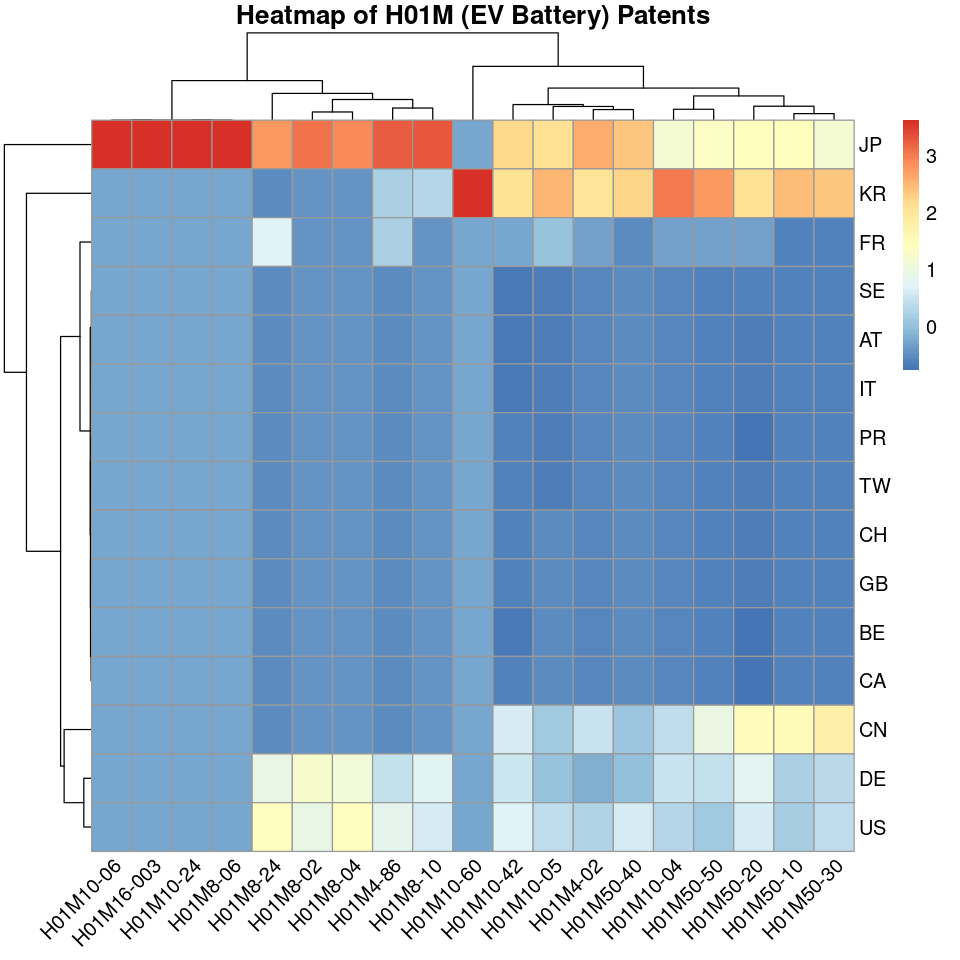

In [31]:
# now let's construct the heatmap
options(repr.plot.width=8, repr.plot.height=8, dpi=400)
h01m_heatmap_df %>%
    scale() %>%
    pheatmap(main="Heatmap of H01M (EV Battery) Patents", angle_col = 45,
                fontsize = 12)

In [40]:
# let's focus on firms
h01m %>%
    .[, .N, by = .(name, cpcCodeB1)] %>%
    .[order(-N)] %>%
    # filter with N >= 50
    .[N >= 70] %>%
    # get cpc code from cpcCodeB1 by getting characters after cpc/
    .[, cpc := str_extract(cpcCodeB1, 'cpc/(.*)')] %>%
    # delete 'cpc/' from cpc
    .[, cpc := str_replace(cpc, 'cpc/', '')] %>%
    # drop cpcCodeB1
    .[, cpcCodeB1 := NULL] %>%
    # dcast
    dcast(name ~ cpc, value.var = 'N', fill = 0) %>%
    as.data.frame() -> h01m_heatmap_firms_df

# set rownames
rownames(h01m_heatmap_firms_df) <- h01m_heatmap_firms_df$name

# delete name column
h01m_heatmap_firms_df <- h01m_heatmap_firms_df[, -1]

head(h01m_heatmap_firms_df)

,H01M10-04,H01M10-05,H01M10-42,H01M10-60,H01M4-02,H01M50-10,H01M50-20,H01M50-30,H01M50-40,H01M50-50
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Asahi Kasei Kabushiki Kaisha,0,0,0,0,0,0,0,0,155,0
Audi AG,0,0,0,0,0,0,96,0,0,0
BASF SE,0,92,0,0,0,0,0,0,0,0
BYD Company Limited,0,0,87,0,0,0,282,0,0,0
Bayerische Motoren Werke Aktiengesellschaft,0,0,0,0,0,0,78,0,0,0
"CALB Co., Ltd.",0,0,0,0,0,0,116,0,0,0


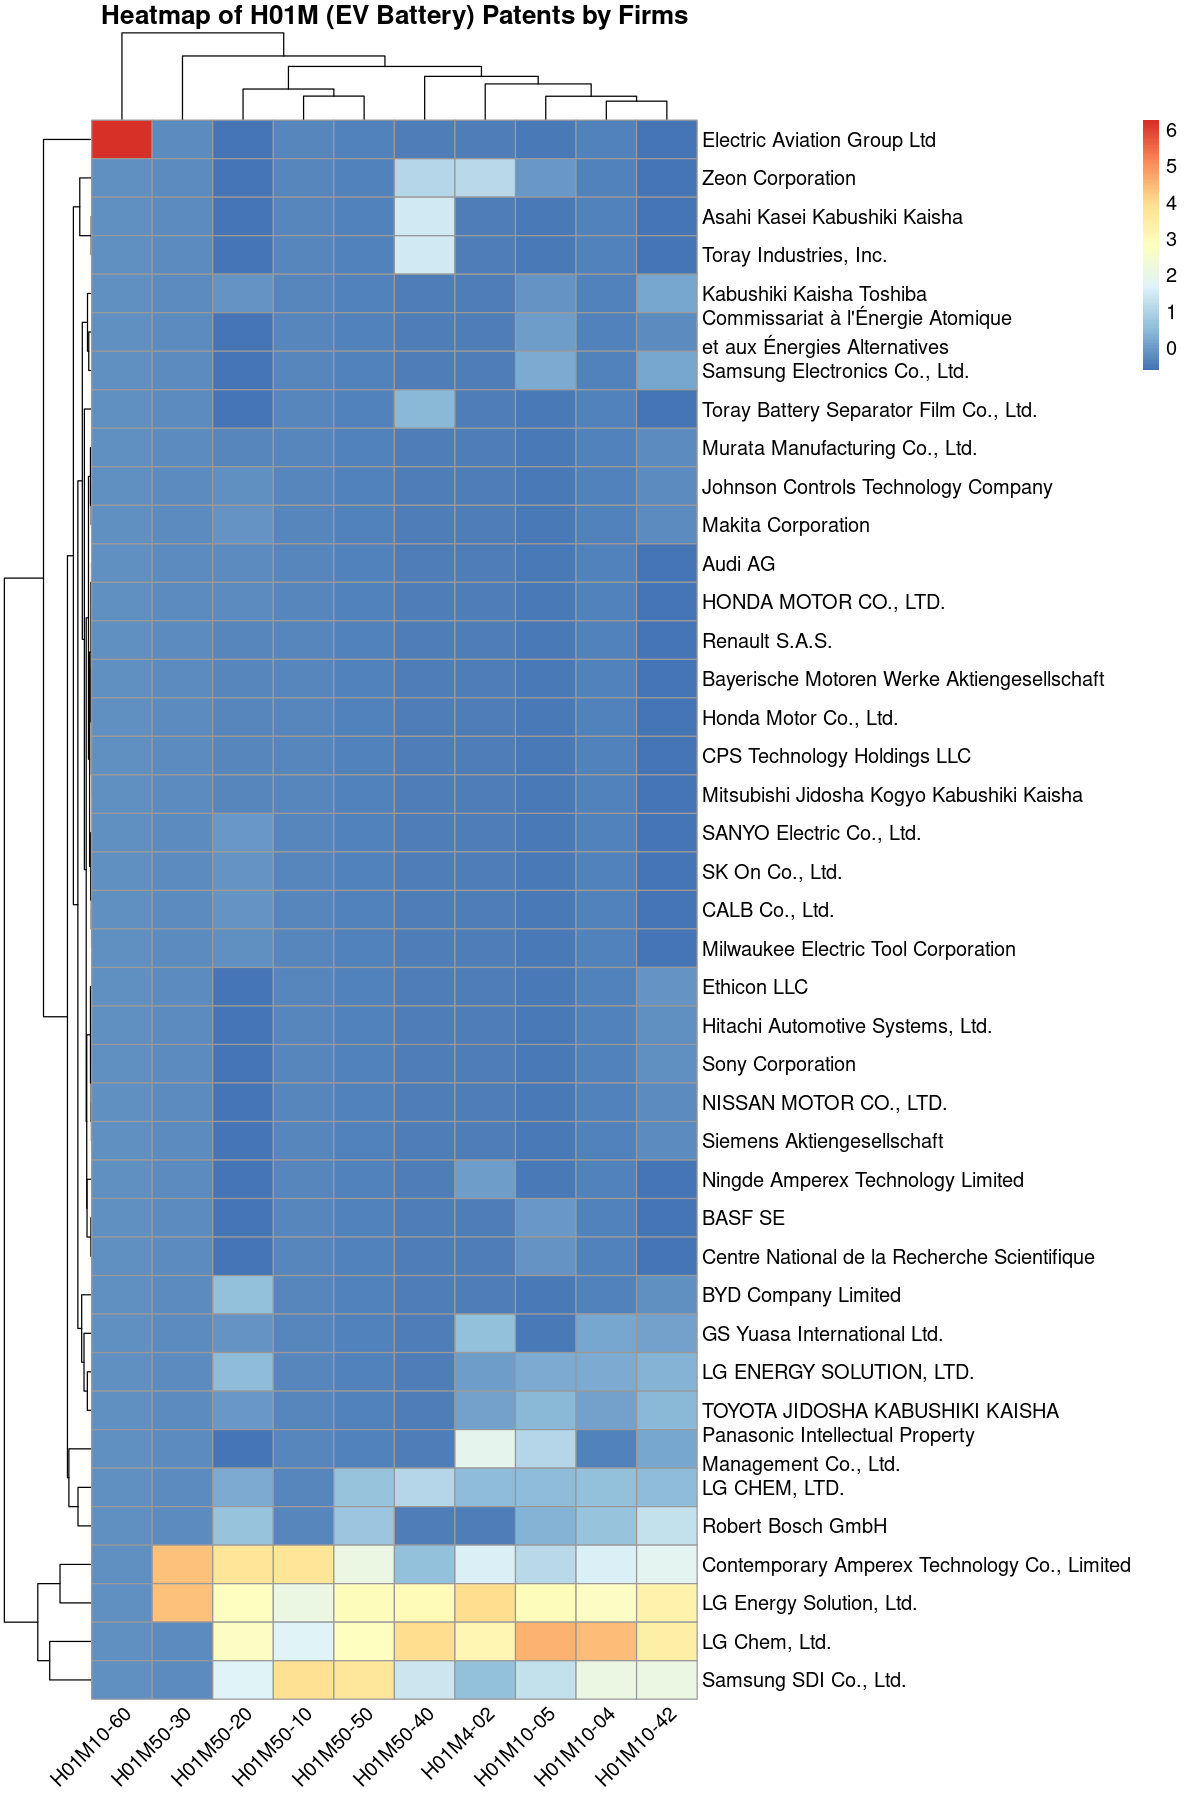

In [42]:
# heatmap
options(repr.plot.width=10, repr.plot.height=15, dpi=400)
h01m_heatmap_firms_df %>%
    scale() %>%
    pheatmap(main="Heatmap of H01M (EV Battery) Patents by Firms",
                angle_col = 45,
                fontsize = 12)

## Analyze all relevant patents

Now, we will combine all the datasets of the following
CPC class:

- CPC class H01M (Electrochemistry)
- CPC class H02J (Circuit arrangements or systems for supplying or distributing electric power)
- CPC class B60L (Propulsion of electrically-propelled vehicles)
- CPC class B60K (Arrangement or mounting of propulsion units or of transmissions in vehicles)

In [3]:
cpc_classes <- c(
    'H01M', 'H02J', 'B60K', 'B60L'
)

# create empty data frame
ev_patents <- data.frame()

for (cpc_class in cpc_classes) {
    file_name <- paste0('../data/patent_', cpc_class, '_2014_2024.csv')
    dt <- fread(file_name)
    ev_patents <- rbind(ev_patents, dt)
    print(paste0(cpc_class, ' patents: ', nrow(dt)))
}

[1] "H01M patents: 69017"
[1] "H02J patents: 35295"
[1] "B60K patents: 11248"
[1] "B60L patents: 35320"


In [4]:
str(ev_patents)

Classes ‘data.table’ and 'data.frame':	150880 obs. of  14 variables:
 $ publn      : chr  "http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-" "http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-" "http://data.epo.org/linked-data/data/publication/EP/1659653/B1/-" "http://data.epo.org/linked-data/data/publication/EP/2755269/A1/-" ...
 $ applicant  : chr  "http://data.epo.org/linked-data/data/vc/AEC648C9D6BD5416D6990A8C8B56CD4B" "http://data.epo.org/linked-data/data/vc/AD7240A4098F9C68371DD982972D590F" "http://data.epo.org/linked-data/data/vc/78BF375C39AA0FF0AB5FD3DAB39B88CC" "http://data.epo.org/linked-data/data/vc/A65408431534D01F56986B808B5A8DA8" ...
 $ auth       : chr  "http://data.epo.org/linked-data/id/st3/EP" "http://data.epo.org/linked-data/id/st3/EP" "http://data.epo.org/linked-data/id/st3/EP" "http://data.epo.org/linked-data/id/st3/EP" ...
 $ publnNum   : int  2639871 2639871 1659653 2755269 2693551 2800185 2709755 2735046 1922779 2316558 ...
 $ kind

In [5]:
head(ev_patents)

publn,applicant,auth,publnNum,kind,publnDate,application,cpcCode,name,address,country,cpcCodeB1,cpcCodeB2,cpcCodeB3
<chr>,<chr>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-,http://data.epo.org/linked-data/data/vc/AEC648C9D6BD5416D6990A8C8B56CD4B,http://data.epo.org/linked-data/id/st3/EP,2639871,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-09-03,http://data.epo.org/linked-data/id/application/EP/13158569,http://data.epo.org/linked-data/def/cpc/H01M8-0606,AISIN SEIKI KABUSHIKI KAISHA,http://data.epo.org/linked-data/data/address/77FD70A936E6EF3DBE98944E745DEE64,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-,http://data.epo.org/linked-data/data/vc/AD7240A4098F9C68371DD982972D590F,http://data.epo.org/linked-data/id/st3/EP,2639871,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-09-03,http://data.epo.org/linked-data/id/application/EP/13158569,http://data.epo.org/linked-data/def/cpc/H01M8-0606,KYOCERA CORPORATION,http://data.epo.org/linked-data/data/address/4C58EC2E51F42DF263286575ECDD938D,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/1659653/B1/-,http://data.epo.org/linked-data/data/vc/78BF375C39AA0FF0AB5FD3DAB39B88CC,http://data.epo.org/linked-data/id/st3/EP,1659653,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-10-01,http://data.epo.org/linked-data/id/application/EP/04772414,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/9217E5C07B99644E28D2DC6A81C16241,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2755269/A1/-,http://data.epo.org/linked-data/data/vc/A65408431534D01F56986B808B5A8DA8,http://data.epo.org/linked-data/id/st3/EP,2755269,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-07-16,http://data.epo.org/linked-data/id/application/EP/12829137,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/E22A02DAE129AEC41CCDC3621B429D11,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2693551/A1/-,http://data.epo.org/linked-data/data/vc/2AA692642DBD43AD8E6D325C3B721A17,http://data.epo.org/linked-data/id/st3/EP,2693551,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-02-05,http://data.epo.org/linked-data/id/application/EP/12762902,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/CE95D1CD03E7A6E0F19ACC945E9D45A0,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2800185/A1/-,http://data.epo.org/linked-data/data/vc/2AA692642DBD43AD8E6D325C3B721A17,http://data.epo.org/linked-data/id/st3/EP,2800185,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-11-05,http://data.epo.org/linked-data/id/application/EP/12862937,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/CE95D1CD03E7A6E0F19ACC945E9D45A0,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M


In [100]:
# which country has the most patents?
ev_patents %>%
    unique(by = 'publnNum') %>%
    .[, .N, by = 'country'] %>%
    .[order(-N)] %>%
    head(15)

country,N
<chr>,<int>
JP,13006
KR,8325
DE,7717
US,7581
CN,4926
FR,2750
GB,1125
CH,1029
SE,899


In [7]:
# which firm has the most patents?
ev_patents %>%
    unique(by = 'publnNum') %>%
    .[, .N, by = 'name'] %>%
    .[order(-N)] %>%
    head(20)

name,N
<chr>,<int>
"LG Chem, Ltd.",1741
"LG Energy Solution, Ltd.",1685
"Contemporary Amperex Technology Co., Limited",1282
TOYOTA JIDOSHA KABUSHIKI KAISHA,1208
"Samsung SDI Co., Ltd.",1128
Robert Bosch GmbH,978
"Panasonic Intellectual Property Management Co., Ltd.",916
Siemens Aktiengesellschaft,689
"Samsung Electronics Co., Ltd.",608


In [25]:
# let's check how firms differ in their patenting activities
ev_patents %>%
    .[, .N, by = .(name, cpcCodeB1)] %>%
    .[order(-N)] %>%
    # filter with N >= 100
    .[N >= 70] %>%
    # get cpc code from cpcCodeB1 by getting characters after cpc/
    .[, cpc := str_extract(cpcCodeB1, 'cpc/(.*)')] %>%
    # delete 'cpc/' from cpc
    .[, cpc := str_replace(cpc, 'cpc/', '')] %>%
    # drop cpcCodeB1
    .[, cpcCodeB1 := NULL] %>%
    # dcast
    dcast(name ~ cpc, value.var = 'N', fill = 0) %>%
    as.data.frame() -> ev_heatmap_firms_df

# set rownames
rownames(ev_heatmap_firms_df) <- ev_heatmap_firms_df$name

# delete name column
ev_heatmap_firms_df <- ev_heatmap_firms_df[, -1]

head(ev_heatmap_firms_df)

,B60K15-03,B60K35-20,B60L15-20,B60L3-0023,B60L50-10,B60L50-50,B60L53-10,B60L53-20,B60L53-30,B60L53-60,⋯,H01M50-30,H01M50-40,H01M50-50,H02J3-38,H02J50-10,H02J50-40,H02J7-00032,H02J7-0013,H02J7-0029,H02J7-007
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ABB Schweiz AG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,128,0,0,0,0,0,0
Asahi Kasei Kabushiki Kaisha,0,0,0,0,0,0,0,0,0,0,⋯,0,155,0,0,0,0,0,0,0,0
Audi AG,0,219,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
BASF SE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
BYD Company Limited,0,0,0,106,0,82,72,92,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Bayerische Motoren Werke Aktiengesellschaft,0,120,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


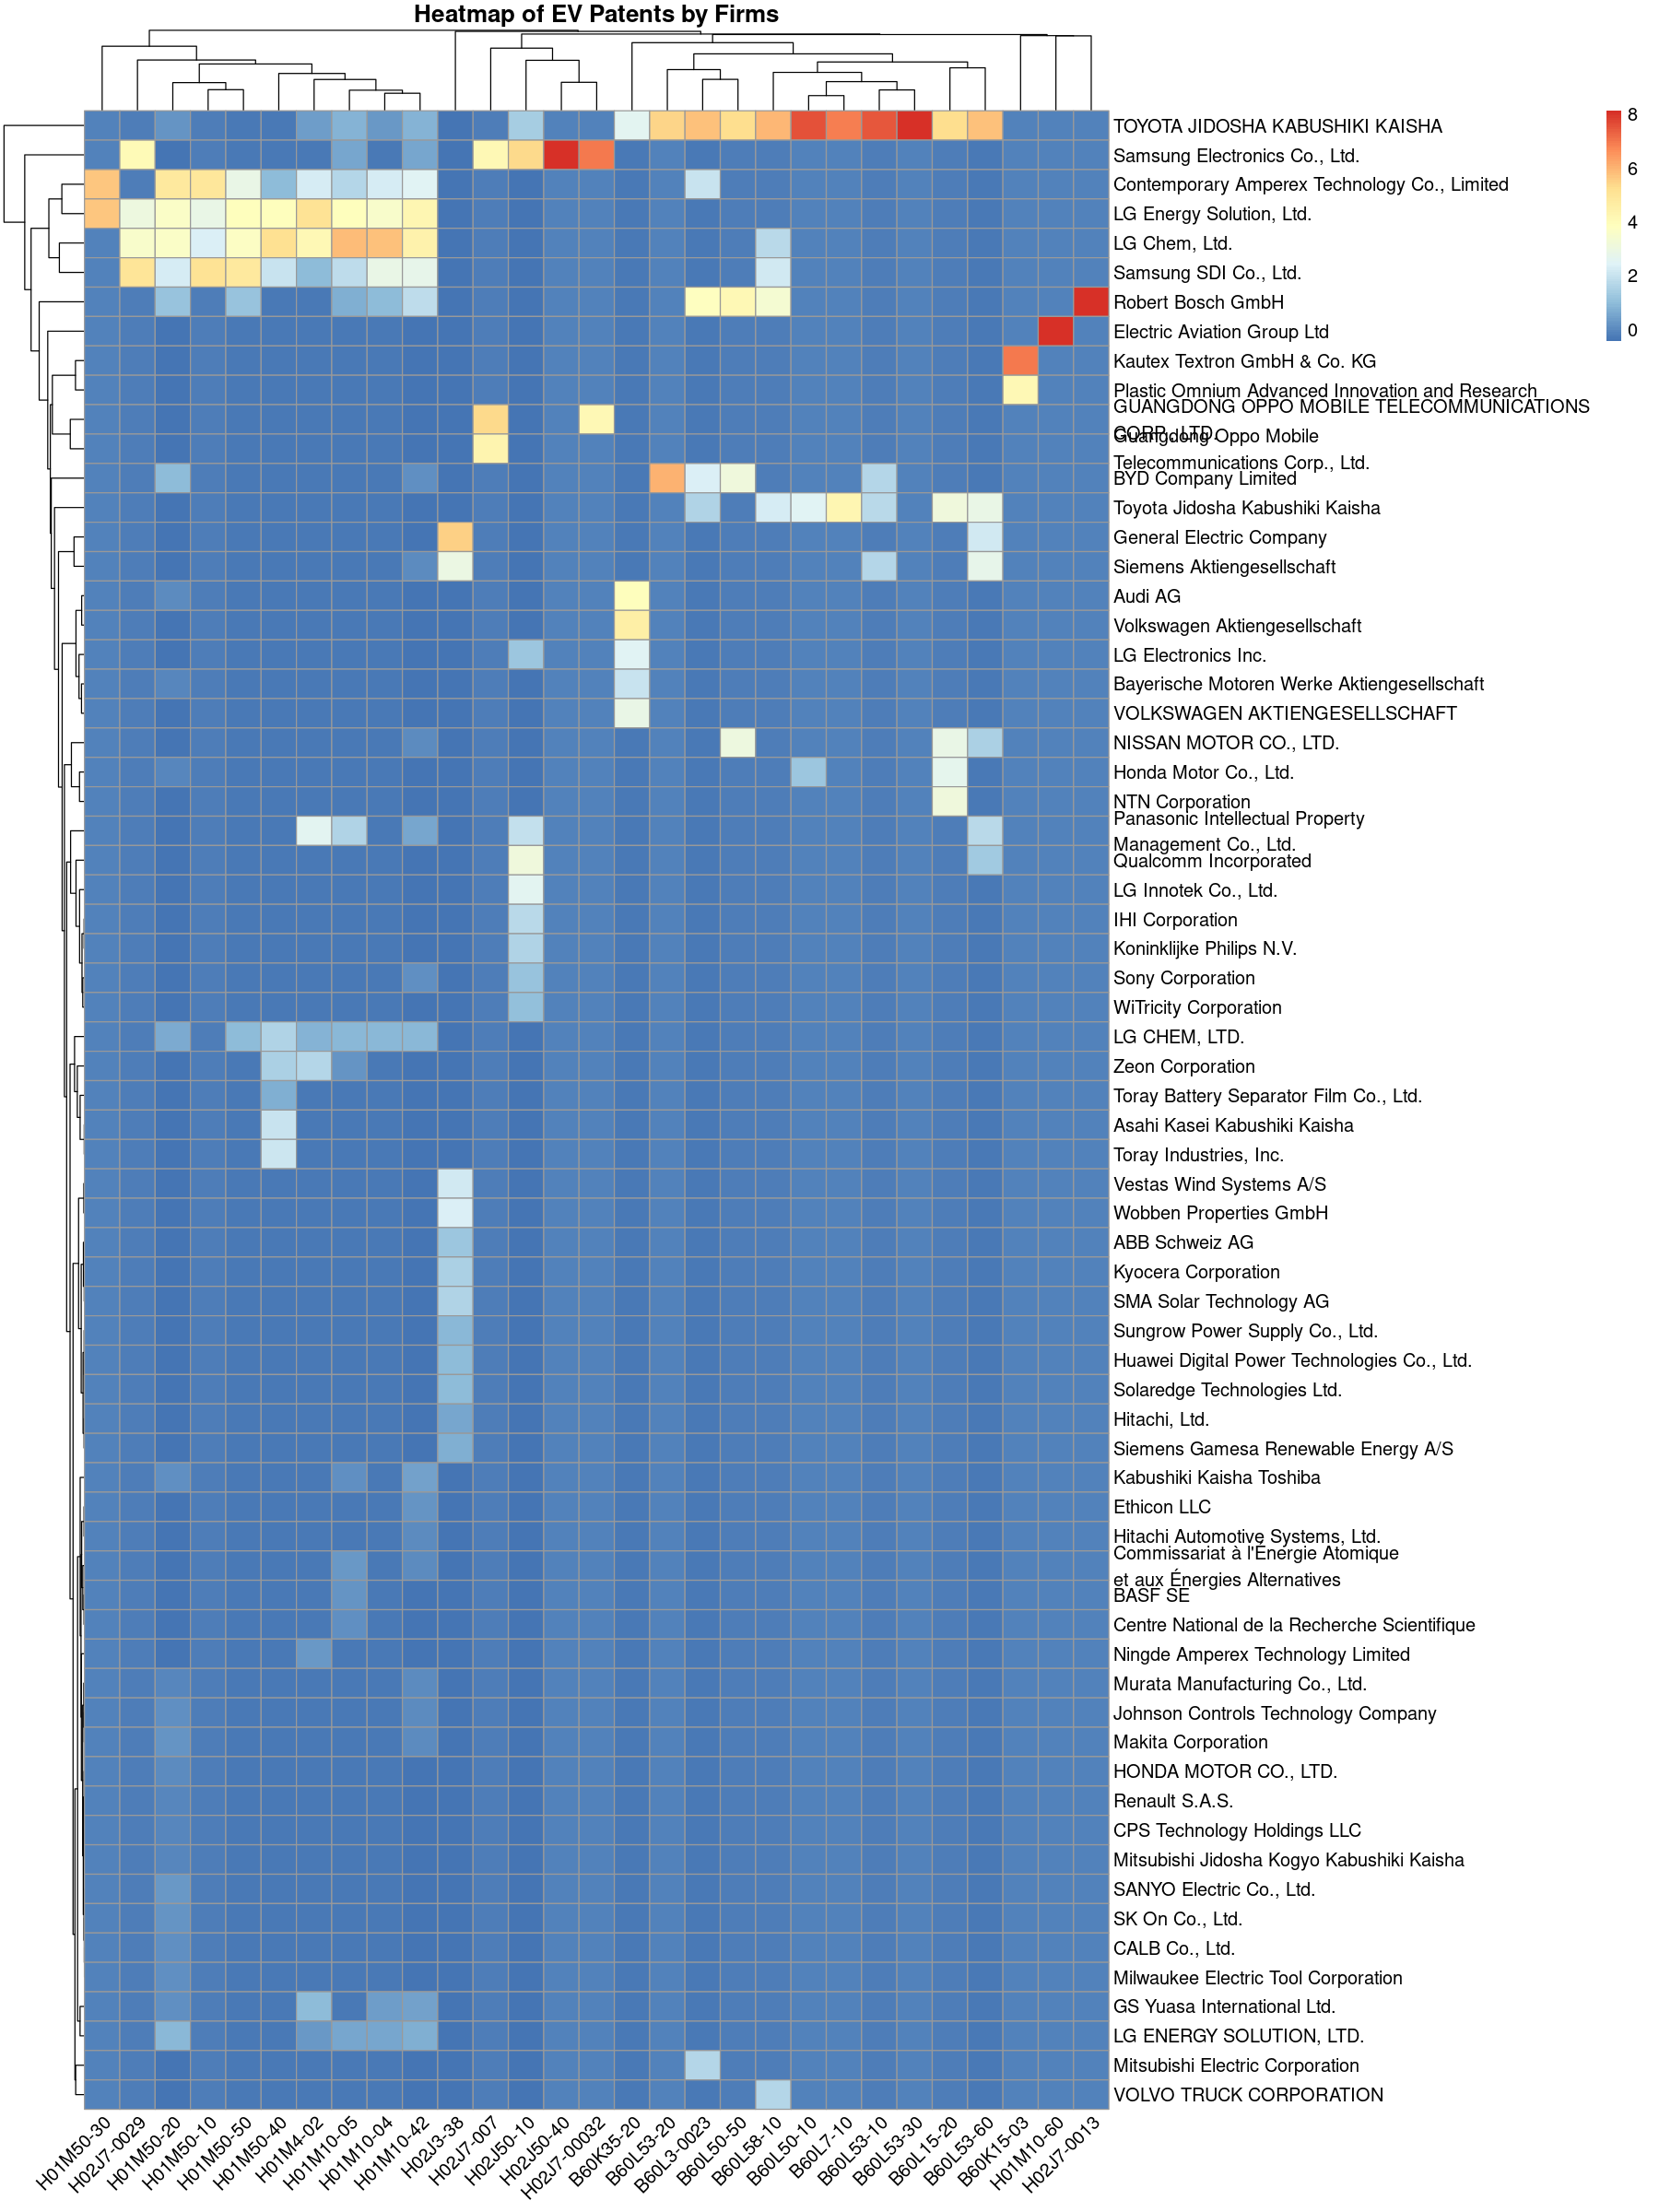

In [31]:
# heatmap
options(repr.plot.width=15, repr.plot.height=20, dpi=600)

ev_heatmap_firms_df %>%
    scale() %>%
    pheatmap(main="Heatmap of EV Patents by Firms",
                angle_col = 45,
                fontsize = 12)

## Where is Tesla?

We did not see Tesla in the top 10 companies in the previous part. Let's find out
where Tesla is in the list of companies with the most patents on electric cars.

In [17]:
ev_patents %>%
    # name contains 'tesla' or 'Tesla'
    .[grepl('tesla', name, ignore.case = TRUE)] %>%
    .[, .(name, publnNum, publnDate, country, cpcCode)] %>%
    str()

Classes ‘data.table’ and 'data.frame':	177 obs. of  5 variables:
 $ name     : chr  "Tesla Motors, Inc." "Tesla Motors, Inc." "Tesla Motors, Inc." "Tesla Motors, Inc." ...
 $ publnNum : int  2302727 2506336 2587583 2587583 2587583 2506336 2244318 2506336 2302727 2506336 ...
 $ publnDate: IDate, format: "2014-11-12" "2014-10-08" ...
 $ country  : chr  "US" "US" "US" "US" ...
 $ cpcCode  : chr  "http://data.epo.org/linked-data/def/cpc/H01M10-63" "http://data.epo.org/linked-data/def/cpc/H01M10-052" "http://data.epo.org/linked-data/def/cpc/H01M10-44" "http://data.epo.org/linked-data/def/cpc/H01M10-46" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [18]:
ev_patents %>%
    # name contains 'tesla' or 'Tesla'
    .[grepl('tesla', name, ignore.case = TRUE)] %>%
    .[, .(name, publnNum, publnDate, country, cpcCode)] %>%
    tail()

name,publnNum,publnDate,country,cpcCode
<chr>,<int>,<IDate>,<chr>,<chr>
Tesla Motors Canada ULC,3766122,2021-01-20,CA,http://data.epo.org/linked-data/def/cpc/B60L50-60
"Tesla, Inc.",2664480,2022-11-23,US,http://data.epo.org/linked-data/def/cpc/B60L58-18
"Tesla, Inc.",3768546,2023-03-15,US,http://data.epo.org/linked-data/def/cpc/B60L53-302
"Tesla, Inc.",4147902,2023-03-15,US,http://data.epo.org/linked-data/def/cpc/B60L53-302
"Tesla, Inc.",4121322,2023-01-25,US,http://data.epo.org/linked-data/def/cpc/B60L53-14
"Tesla, Inc.",4320007,2024-02-14,US,http://data.epo.org/linked-data/def/cpc/B60L53-302


## Do firms collaborate?

In [42]:
head(ev_patents)

publn,applicant,auth,publnNum,kind,publnDate,application,cpcCode,name,address,country,cpcCodeB1,cpcCodeB2,cpcCodeB3
<chr>,<chr>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-,http://data.epo.org/linked-data/data/vc/AEC648C9D6BD5416D6990A8C8B56CD4B,http://data.epo.org/linked-data/id/st3/EP,2639871,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-09-03,http://data.epo.org/linked-data/id/application/EP/13158569,http://data.epo.org/linked-data/def/cpc/H01M8-0606,AISIN SEIKI KABUSHIKI KAISHA,http://data.epo.org/linked-data/data/address/77FD70A936E6EF3DBE98944E745DEE64,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2639871/B1/-,http://data.epo.org/linked-data/data/vc/AD7240A4098F9C68371DD982972D590F,http://data.epo.org/linked-data/id/st3/EP,2639871,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-09-03,http://data.epo.org/linked-data/id/application/EP/13158569,http://data.epo.org/linked-data/def/cpc/H01M8-0606,KYOCERA CORPORATION,http://data.epo.org/linked-data/data/address/4C58EC2E51F42DF263286575ECDD938D,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/1659653/B1/-,http://data.epo.org/linked-data/data/vc/78BF375C39AA0FF0AB5FD3DAB39B88CC,http://data.epo.org/linked-data/id/st3/EP,1659653,http://data.epo.org/linked-data/def/patent/publicationKind_B1,2014-10-01,http://data.epo.org/linked-data/id/application/EP/04772414,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/9217E5C07B99644E28D2DC6A81C16241,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2755269/A1/-,http://data.epo.org/linked-data/data/vc/A65408431534D01F56986B808B5A8DA8,http://data.epo.org/linked-data/id/st3/EP,2755269,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-07-16,http://data.epo.org/linked-data/id/application/EP/12829137,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/E22A02DAE129AEC41CCDC3621B429D11,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2693551/A1/-,http://data.epo.org/linked-data/data/vc/2AA692642DBD43AD8E6D325C3B721A17,http://data.epo.org/linked-data/id/st3/EP,2693551,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-02-05,http://data.epo.org/linked-data/id/application/EP/12762902,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/CE95D1CD03E7A6E0F19ACC945E9D45A0,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M
http://data.epo.org/linked-data/data/publication/EP/2800185/A1/-,http://data.epo.org/linked-data/data/vc/2AA692642DBD43AD8E6D325C3B721A17,http://data.epo.org/linked-data/id/st3/EP,2800185,http://data.epo.org/linked-data/def/patent/publicationKind_A1,2014-11-05,http://data.epo.org/linked-data/id/application/EP/12862937,http://data.epo.org/linked-data/def/cpc/H01M8-0606,Panasonic Corporation,http://data.epo.org/linked-data/data/address/CE95D1CD03E7A6E0F19ACC945E9D45A0,JP,http://data.epo.org/linked-data/def/cpc/H01M8-06,http://data.epo.org/linked-data/def/cpc/H01M8-00,http://data.epo.org/linked-data/def/cpc/H01M


In [39]:
ev_patents %>%
    .[, .N, by = .(publnNum, name, country)] %>%
    .[publnNum == 2639871]

publnNum,name,country,N
<int>,<chr>,<chr>,<int>
2639871,AISIN SEIKI KABUSHIKI KAISHA,JP,1
2639871,KYOCERA CORPORATION,JP,1


In [44]:
ev_patents %>%
    .[, .N, by = .(publnNum, name, country)] %>%
    # add a column by counting the rows of each unique publnNum
    .[, publnNumCount := .N, by = publnNum] %>%
    .[order(-publnNumCount)] %>%
    head(20)

publnNum,name,country,N,publnNumCount
<int>,<chr>,<chr>,<int>,<int>
3363067,"Energ2 Technologies, Inc.",US,1,15
3363067,"Sakshaug, Avery",US,1,15
3363067,"Costantino, Henry, R.",US,1,15
3363067,"Thompkins, Leah, A.",US,1,15
3363067,"Kron, Benjamin, E.",US,1,15
3363067,"Fredrick, Sarah",US,1,15
3363067,"Feaver, Aaron, M.",US,1,15
3363067,"Grose, Jacob Ebenstein",US,1,15
3363067,"Alspaugh, Virginia, Katherine",US,1,15


In [55]:
# firms that are collaborating the most
ev_patents %>%
    .[, .N, by = .(publnNum, name, country)] %>%
    # add a column by counting the rows of each unique publnNum
    .[, publnNumCount := .N, by = publnNum] %>%
    .[order(-publnNumCount)] %>%
    # filter with publnNumCount >= 2
    .[publnNumCount >= 2] %>%
    # create a new column called 'collab_sum' by summing the publnNumCount
    .[, collab_sum := sum(publnNumCount), by = .(name)] %>%
    .[order(-collab_sum, -publnNumCount)] %>%
    head(10)


publnNum,name,country,N,publnNumCount,collab_sum
<int>,<chr>,<chr>,<int>,<int>,<int>
4297141,"LG Energy Solution, Ltd.",KR,2,4,853
3435452,"LG Energy Solution, Ltd.",KR,2,3,853
3651239,"LG Energy Solution, Ltd.",KR,4,3,853
3670447,"LG Energy Solution, Ltd.",KR,3,3,853
3719878,"LG Energy Solution, Ltd.",KR,3,3,853
3664199,"LG Energy Solution, Ltd.",KR,3,3,853
3667778,"LG Energy Solution, Ltd.",KR,1,3,853
3767713,"LG Energy Solution, Ltd.",KR,2,3,853
3694042,"LG Energy Solution, Ltd.",KR,3,3,853


## Collaboration between countries

In [67]:
ev_patents %>%
    .[, .N, by = .(publnNum, name, country)] %>%
    # add a column by counting the rows of each unique publnNum
    .[, publnNumCount := .N, by = publnNum] %>%
    .[order(-publnNumCount)] %>%
    # filter with publnNumCount >= 2
    .[publnNumCount >= 2] %>%
    # let column 'N' be 1 for each row
    .[, N := 1] %>%
    unique(by = c('publnNum', 'country')) %>%
    # dcast publnNum to country
    dcast(publnNum ~ country, value.var = 'N', fill = 0) -> collab_matrix

In [68]:
head(collab_matrix)

publnNum,AE,AM,AR,AT,AU,BB,BE,BG,BM,⋯,SE,SG,SI,SK,TH,TR,TW,UA,US,VG
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
909675,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1085589,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1087451,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1139481,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1139483,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1146580,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [102]:
ev_patents %>%
    unique(by = 'publnNum') %>%
    .[, .N, by = 'country'] %>%
    .[order(-N)] %>%
    head(15) %>%
    .[, country] -> top_countries

top_countries

[1] "JP" "KR" "DE" "US" "CN" "FR" "GB" "CH" "SE" "IT" "NL" "CA" "TW" "AT" "DK"

In [155]:
top_countries

[1] "JP" "KR" "DE" "US" "CN" "FR" "GB" "CH" "SE" "IT" "NL" "CA" "TW" "AT" "DK"

In [160]:
# create new data frame
collab_country_df <- data.frame()

for (country in top_countries) {
    collab_matrix %>%
    .[get(country) > 0] %>%
    # drop publnNum
    .[, publnNum := NULL] %>%
    # transpose
    t() %>%
    # convert to datatable keep rownames
    as.data.table(keep.rownames = TRUE) %>%
    # calcualte the sum of each row
    .[, sum := rowSums(.SD), .SDcols = -'rn'] %>%
    # drop all columns start with 'V'
    .[, .SD, .SDcols = -grep('V', names(.))] %>%
    .[order(-sum)] %>%
    # change column name 'sum' to 'US'
    setnames('sum', country) %>%
    # filter with run in top_countries
    .[rn %in% top_countries] %>%
    as.data.frame() -> temp_df

    # set rownames
    rownames(temp_df) <- temp_df$rn

    
    temp_df %>%
        t() %>%
        as.data.frame() %>%
        # remove first row
        .[-1, ] -> temp_df2


    # order temp_df2's columns by country
    temp_df2 <- temp_df2[, top_countries]

    # combine the data frames by column
    collab_country_df <- rbind(collab_country_df, temp_df2)
}

In [161]:
collab_country_df

,JP,KR,DE,US,CN,FR,GB,CH,SE,IT,NL,CA,TW,AT,DK
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
JP,1963,56,64,42,3,65,8,0,0,1,3,17,2,3,1
KR,56,1214,208,33,1,3,1,0,0,0,0,3,0,14,0
DE,64,208,1202,105,16,32,10,18,7,4,14,13,2,14,15
US,42,33,105,934,24,15,17,22,4,8,9,28,5,0,2
CN,3,1,16,24,543,8,0,2,3,1,1,6,6,0,1
FR,65,3,32,15,8,555,12,24,3,11,3,13,0,1,1
GB,8,1,10,17,0,12,122,2,0,0,0,0,0,0,0
CH,0,0,18,22,2,24,2,216,1,2,17,0,0,0,0
SE,0,0,7,4,3,3,0,1,40,0,1,0,0,0,1


In [183]:
# create geom_tile plot
collab_country_df %>%
    as.data.table(keep.rownames = TRUE) %>%
    # convert all columns except 'rn' to numeric
    .[, (2:ncol(.)) := lapply(.SD, as.numeric), .SDcols = -'rn'] %>%
    as.data.frame() -> collab_country_df2

# rownames to column
rownames(collab_country_df2) <- collab_country_df2$rn

# delete rn column
collab_country_df2 <- collab_country_df2[, -1]

head(collab_country_df2)

,JP,KR,DE,US,CN,FR,GB,CH,SE,IT,NL,CA,TW,AT,DK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JP,1963,56,64,42,3,65,8,0,0,1,3,17,2,3,1
KR,56,1214,208,33,1,3,1,0,0,0,0,3,0,14,0
DE,64,208,1202,105,16,32,10,18,7,4,14,13,2,14,15
US,42,33,105,934,24,15,17,22,4,8,9,28,5,0,2
CN,3,1,16,24,543,8,0,2,3,1,1,6,6,0,1
FR,65,3,32,15,8,555,12,24,3,11,3,13,0,1,1


In [188]:
collab_country_df2 %>%
    as.matrix() -> collab_country_matrix

# set diagonal to 0
diag(collab_country_matrix) <- 0

collab_country_matrix

,JP,KR,DE,US,CN,FR,GB,CH,SE,IT,NL,CA,TW,AT,DK
JP,0,56,64,42,3,65,8,0,0,1,3,17,2,3,1
KR,56,0,208,33,1,3,1,0,0,0,0,3,0,14,0
DE,64,208,0,105,16,32,10,18,7,4,14,13,2,14,15
US,42,33,105,0,24,15,17,22,4,8,9,28,5,0,2
CN,3,1,16,24,0,8,0,2,3,1,1,6,6,0,1
FR,65,3,32,15,8,0,12,24,3,11,3,13,0,1,1
GB,8,1,10,17,0,12,0,2,0,0,0,0,0,0,0
CH,0,0,18,22,2,24,2,0,1,2,17,0,0,0,0
SE,0,0,7,4,3,3,0,1,0,0,1,0,0,0,1
IT,1,0,4,8,1,11,0,2,0,0,3,0,0,1,0


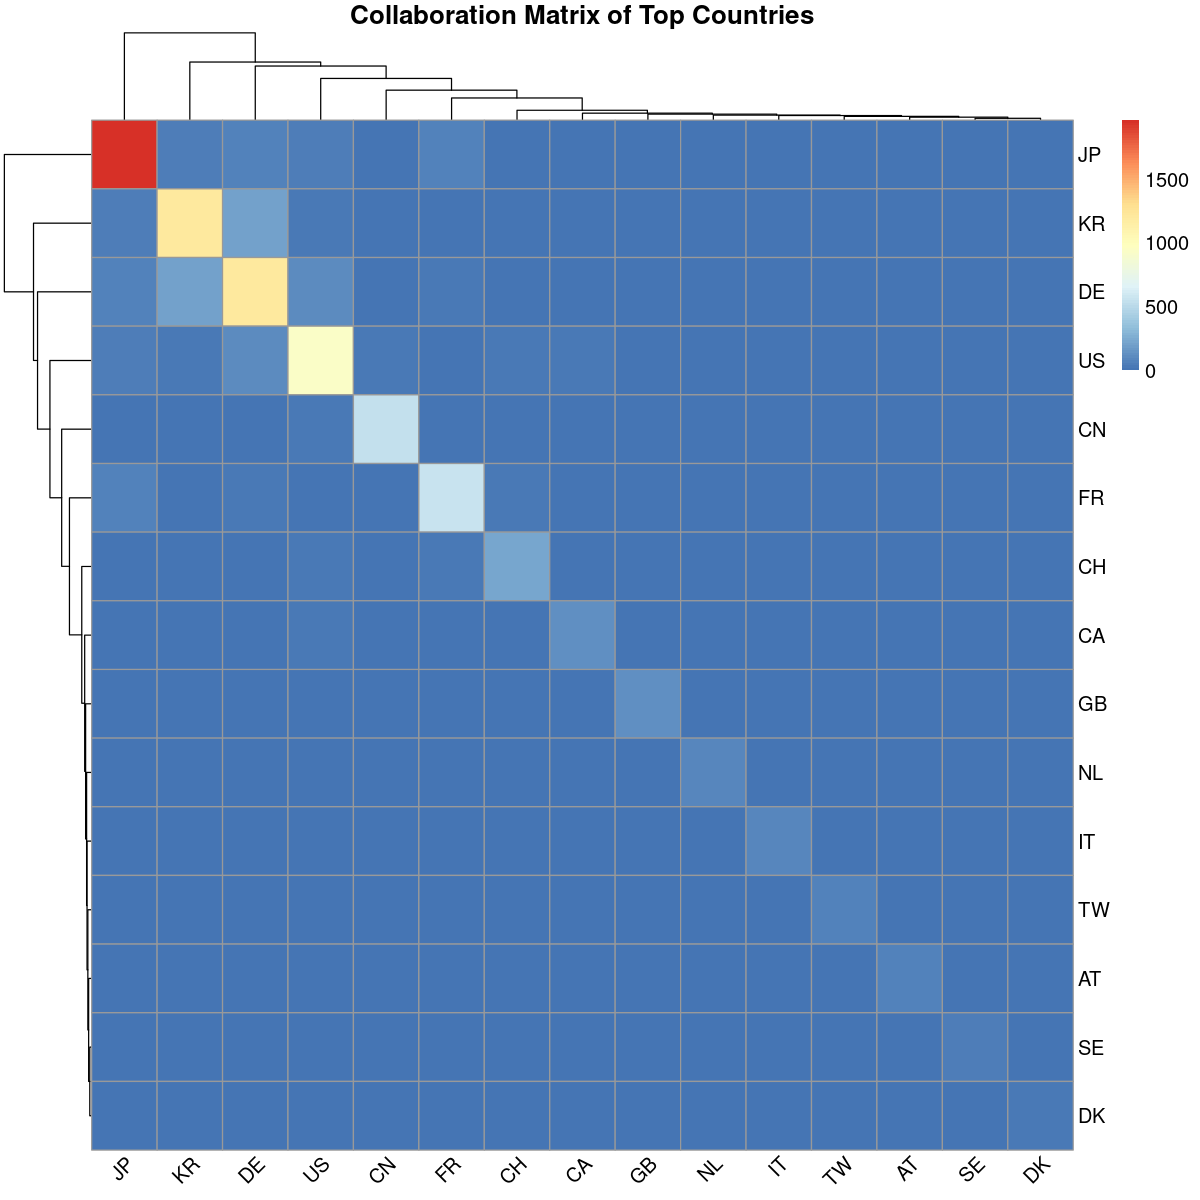

In [191]:
# heatmap
options(repr.plot.width=10, repr.plot.height=10, dpi=400)
collab_country_df2 %>%
    pheatmap(main="Collaboration Matrix of Top Countries",
                angle_col = 45,
                fontsize = 12)

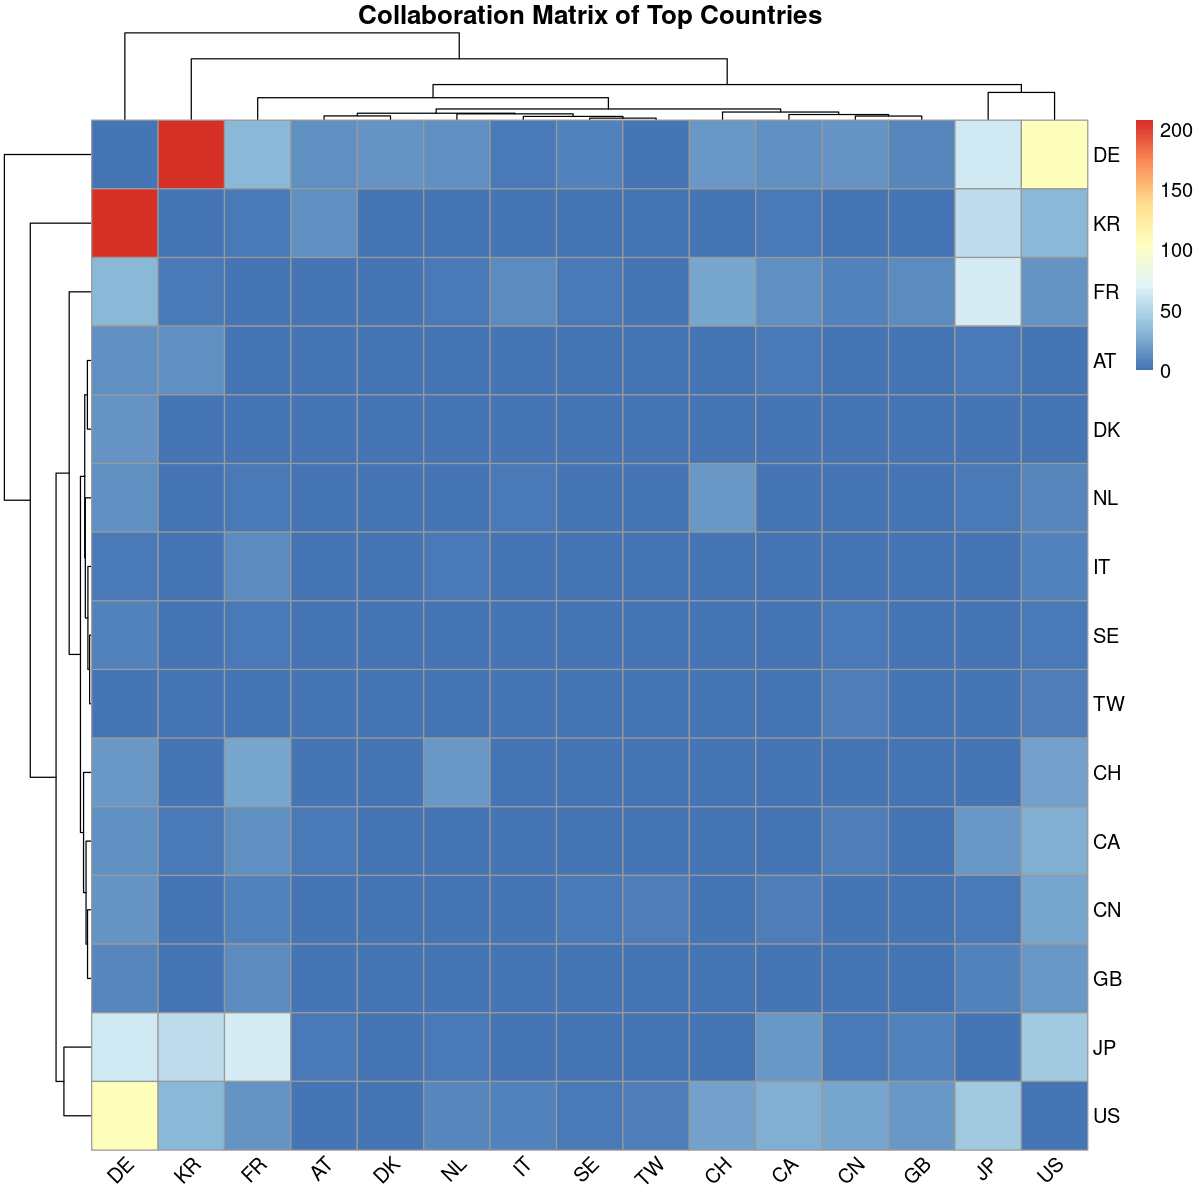

In [194]:
options(repr.plot.width=10, repr.plot.height=10, dpi=400)
collab_country_matrix %>%
    pheatmap(main="Collaboration Matrix of Top Countries",
                angle_col = 45,
                fontsize = 12)

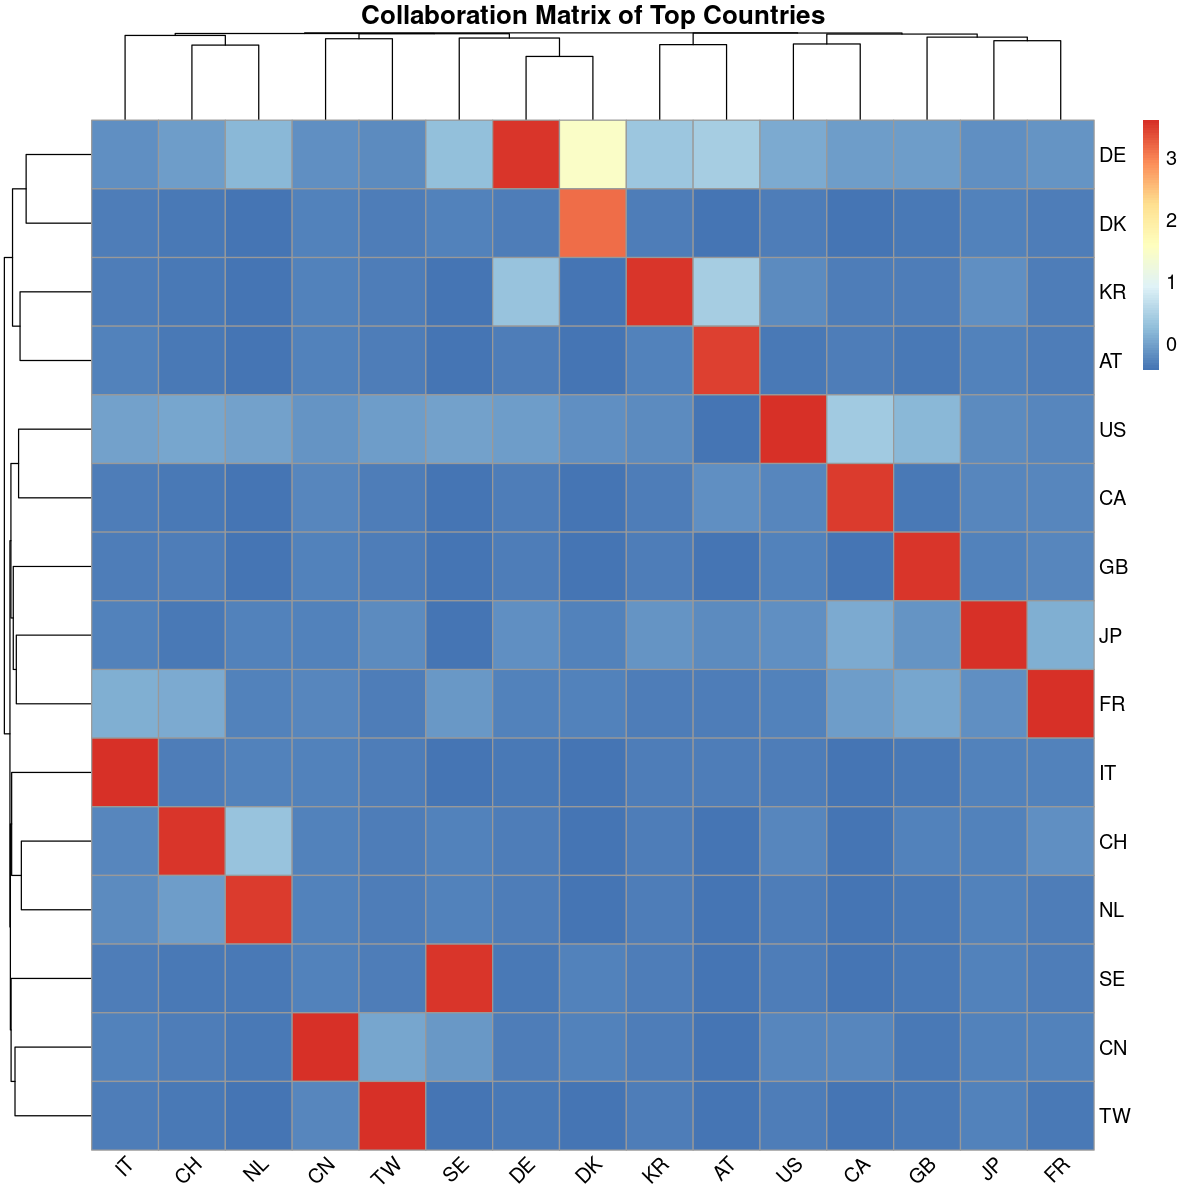

In [192]:
options(repr.plot.width=10, repr.plot.height=10, dpi=400)
collab_country_df2 %>%
    scale() %>%
    pheatmap(main="Collaboration Matrix of Top Countries",
                angle_col = 45,
                fontsize = 12)

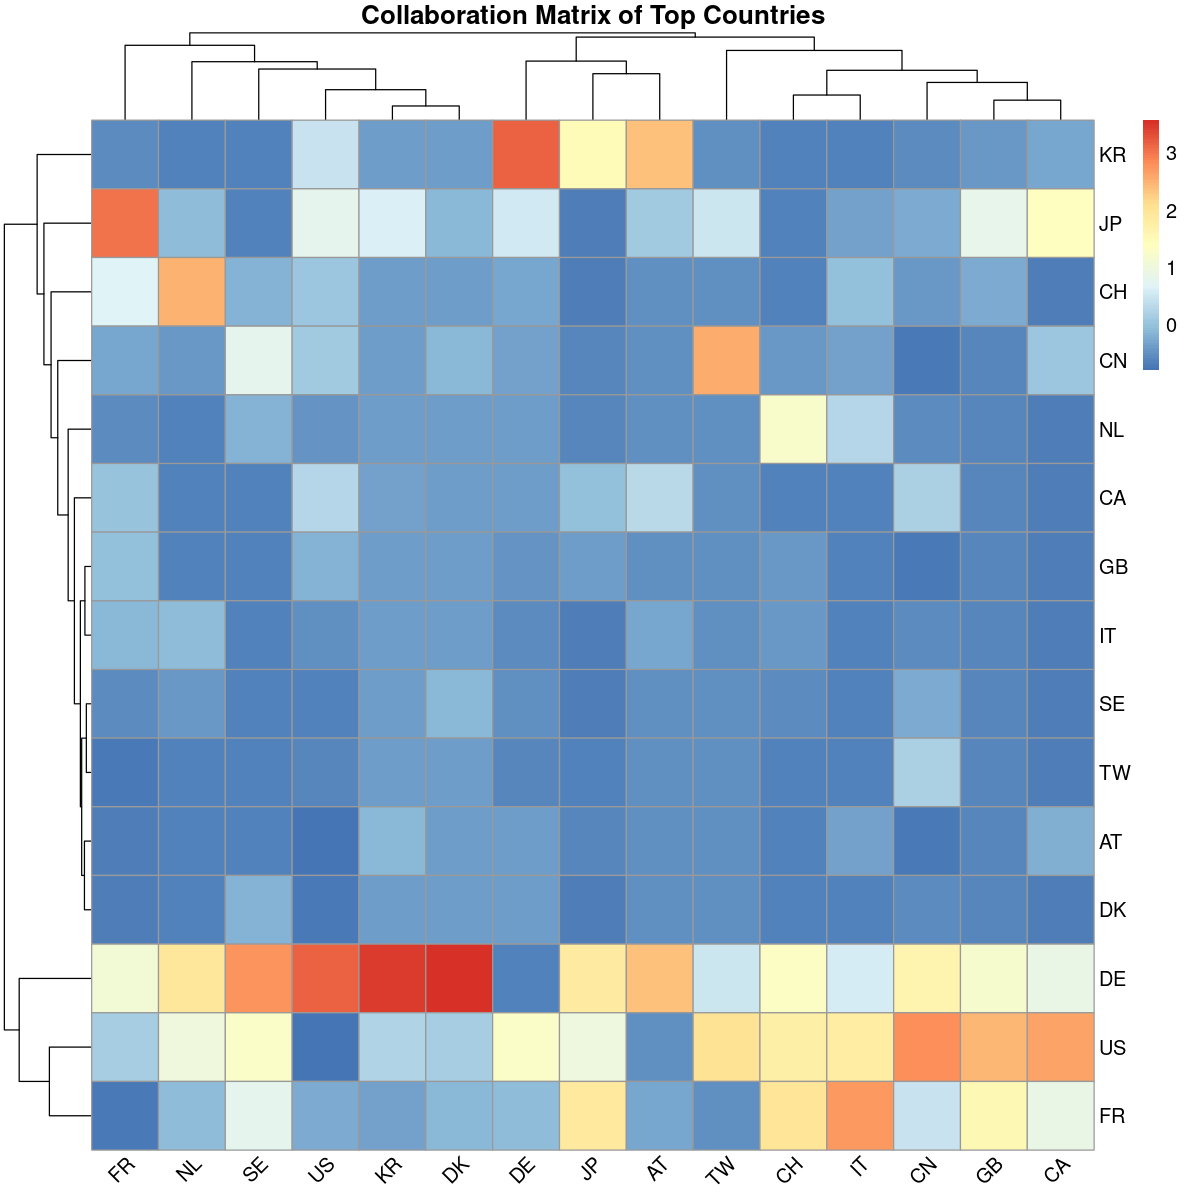

In [193]:
options(repr.plot.width=10, repr.plot.height=10, dpi=400)
collab_country_matrix %>%
    scale() %>%
    pheatmap(main="Collaboration Matrix of Top Countries",
                angle_col = 45,
                fontsize = 12)

## Some interesting visualizations based on patents

https://www.fastcompany.com/90180943/the-real-difference-between-google-and-apple-2